# **CIS 545: Final Project**
---
# *Evolution of Music Trends Over the Years*

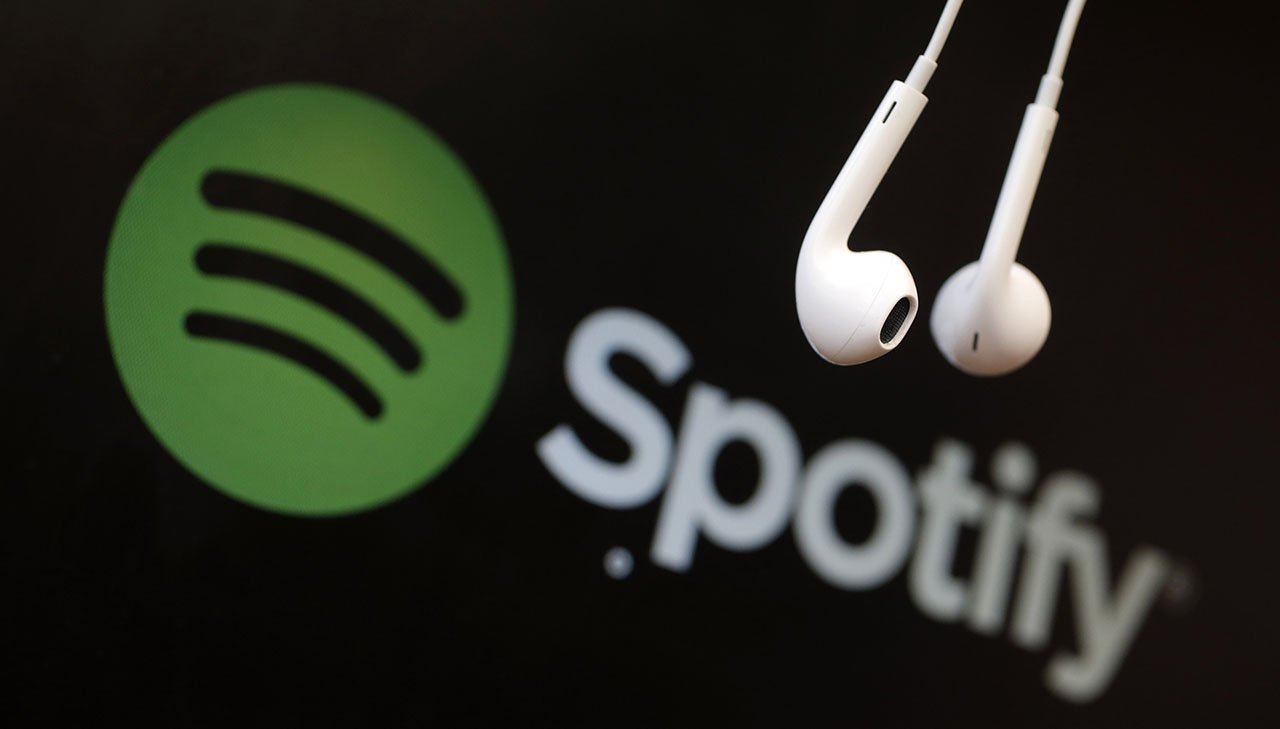

# Proposed Question:
# *Can we predict the year a song is released given a feature?*

### **Data Wrangling:**
The 160k+ Spotify dataset we found is very large, and includes a wide variety of features. We feel that it covers a far range of music in terms of release year, and that it would give us a proper indication of how music has changed over the course of history.

### **Exploratory Data Analysis:**
The specific ideas we have for this  topic correlate with things all of us as music fans wonder about songs. Some things we can visualise/analyse without models with this data can be:
*  What genre appears the most, and is there a general correlation between year and genre?
*  What about for other feaures?
*  Which artist is featured the most, which artist has most popularity within this dataset?
*  What songs have the best dancebility, and is this correlated with popularity?
*  Is there a specific month of the year within which most songs are released? Does month have a  correlation with popularity? 

### **Modeling:**

As we began the EDA process, we became interested in seeing how the features individually vary by year. We decided to take a further look at this. 

Models:
* Random Tree
* Linear Regression
* Decision Tree
* Logistic Regression

Our General Process:
1. Processing our data and creating the test and train sets
2. With the test and train sets, we were able to run all of our models for the numererous variables. 
3. Then we can attempt to predict what year a song was released based on the features.
4. Compare and discuss accuracy of each model.
5. We also one-hot-encoded our date since the Logistic Regression needs data to be represented as 1s and 0s for the features included for this model. To do so, we grouped levels within features. 



In [1]:
!pip install ggplot
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pydot

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz

from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import train_test_split as split


     |████████████████████████████████| 2.2MB 6.9MB/s 


# The Data Set: Overview
This .csv file contains a range of numerical, dummy, and categorical features. Each row represents a single track, and each column represents a feature of the track, and includes attributes pertianing to the audio as well as identifiers.

In [2]:
!wget https://drive.google.com/file/d/16IZpBkswVimSEl-zQVyYLoXeIE1rKTDk/view?usp=sharing

url = 'https://drive.google.com/file/d/16IZpBkswVimSEl-zQVyYLoXeIE1rKTDk/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
spotify_data = df

--2020-12-16 04:43:05--  https://drive.google.com/file/d/16IZpBkswVimSEl-zQVyYLoXeIE1rKTDk/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.217.212.101, 172.217.212.138, 172.217.212.102, ...
Connecting to drive.google.com (drive.google.com)|172.217.212.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  69.40K  --.-KB/s    in 0.002s  

2020-12-16 04:43:06 (29.8 MB/s) - ‘view?usp=sharing’ saved [71067]



# Interpreting the Dataset
In the subsequent cells, we are working to get an understanding of how the dataset holds information. In order to start the EDA process, we must make sure that our view of the data is encompassing of what we have. Let us start by noting that each row in the dataset references a single track from the Spotify API. 

In order to begin the data wrangling, we must note what exactly is in the dataset and how each feature is stored.


In [3]:
spotify_data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [4]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

We also want to get the numerical description of the data in each column/feature for the tracks.

In [5]:
spotify_data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


We are not interested in the ID of each row because it won't pertain to us; every single row has an individual ID.

In [6]:
spotify_data = spotify_data.drop(labels=['id'], axis=1)
spotify_data.shape

(170653, 18)

And now, we can check to see how many duplicates we have once the ID column has been removed. These duplicates include every single feature; if they are the same for a row, it means every single attribute is the same. 

In [7]:
spotify_data.duplicated().sum()

543

We can see that there are 543 rows with all rows exactly the same, after removing id. This includes release date and year, so they are technical duplicates. Thus, we'll want to get rid of these duplicate rows.

In [8]:
spotify_data = spotify_data[~spotify_data.duplicated()==1]
spotify_data.shape

(170110, 18)

To see what the "id" column and duplicate drops might have done for our data, we will get the information and descriptions once again. 

In [9]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170110 entries, 0 to 170652
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170110 non-null  float64
 1   year              170110 non-null  int64  
 2   acousticness      170110 non-null  float64
 3   artists           170110 non-null  object 
 4   danceability      170110 non-null  float64
 5   duration_ms       170110 non-null  int64  
 6   energy            170110 non-null  float64
 7   explicit          170110 non-null  int64  
 8   instrumentalness  170110 non-null  float64
 9   key               170110 non-null  int64  
 10  liveness          170110 non-null  float64
 11  loudness          170110 non-null  float64
 12  mode              170110 non-null  int64  
 13  name              170110 non-null  object 
 14  popularity        170110 non-null  int64  
 15  release_date      170110 non-null  object 
 16  speechiness       17

In [10]:
spotify_data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170110.000000,170110.000000,170110.000000,170110.000000,1.701100e+05,170110.000000,170110.000000,170110.000000,170110.000000,170110.000000,170110.000000,170110.000000,170110.000000,170110.000000,170110.000000
mean,0.529246,1976.878990,0.500889,0.537838,2.309703e+05,0.483208,0.084839,0.165714,5.199612,0.205898,-11.444822,0.707001,31.526706,0.098516,116.895498
std,0.262955,25.876428,0.375731,0.176022,1.259665e+05,0.267378,0.278643,0.312317,3.514944,0.174869,5.677984,0.455139,21.791668,0.162946,30.697529
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.318000,1956.000000,0.101000,0.416000,1.699385e+05,0.256000,0.000000,0.000000,2.000000,0.098700,-14.581750,0.000000,12.000000,0.034900,93.478000
50%,0.540000,1978.000000,0.514000,0.548000,2.074930e+05,0.472000,0.000000,0.000210,5.000000,0.136000,-10.563000,1.000000,34.000000,0.045000,114.772500
75%,0.747000,1999.000000,0.891000,0.669000,2.623698e+05,0.704000,0.000000,0.097975,8.000000,0.261000,-7.177000,1.000000,48.000000,0.075700,135.566750
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


##EDA

We can first start with a general overview of each column of our data (each column aligns with a specific feature).

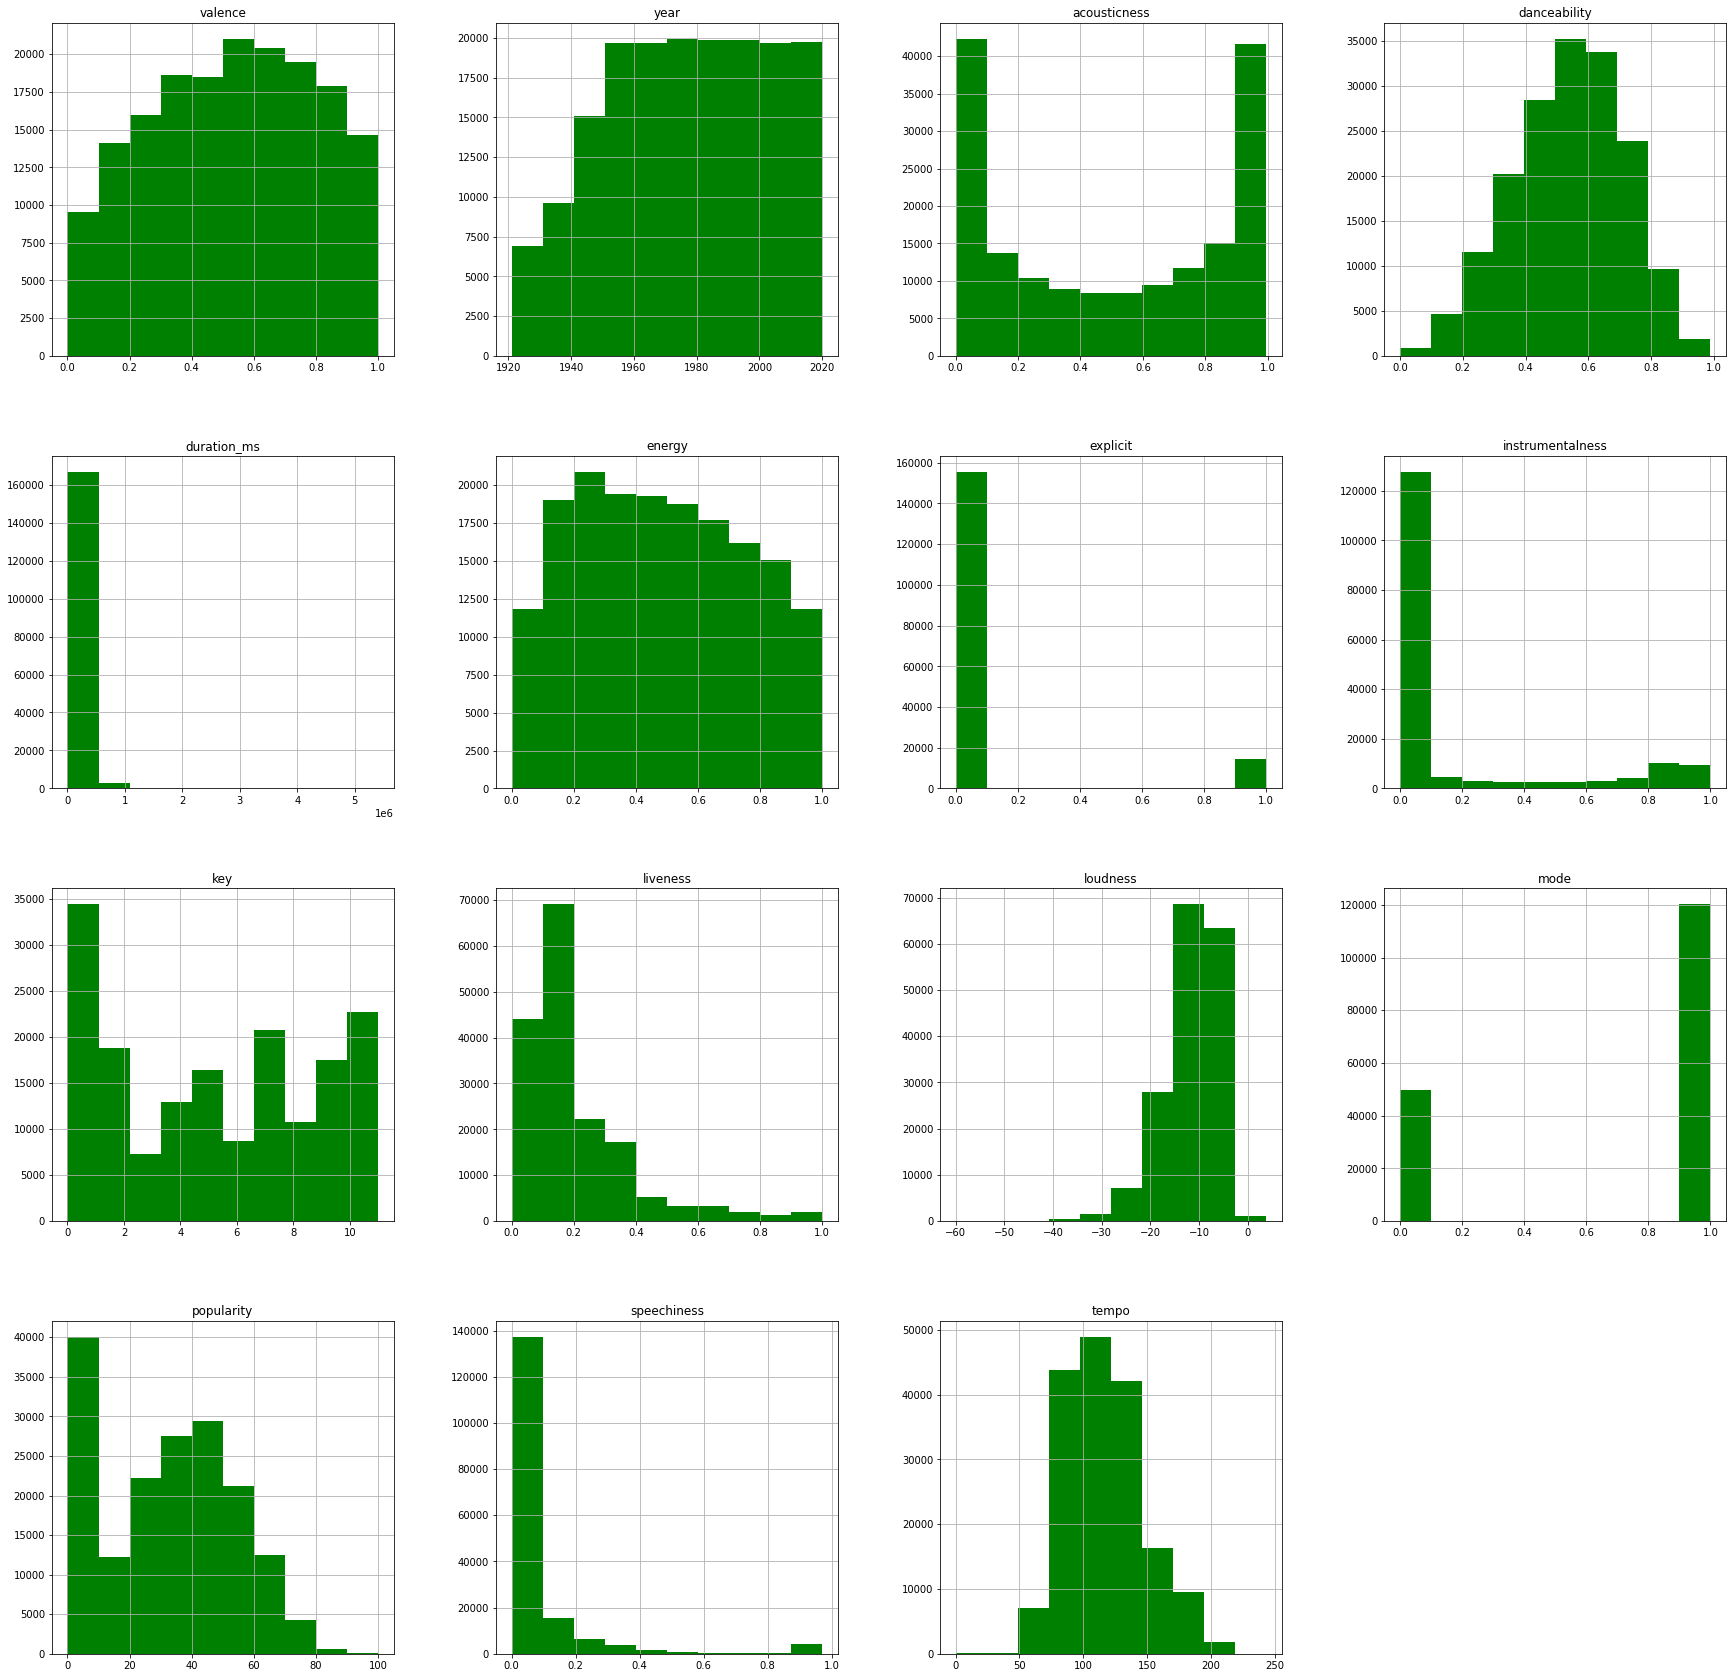

In [11]:
spotify_data.hist(figsize=(30, 30), color='green')
plt.show()

Next, which groups of features correlate with each other? To get a general idea of this, we will be performing a correlation matrix between paired attributes.

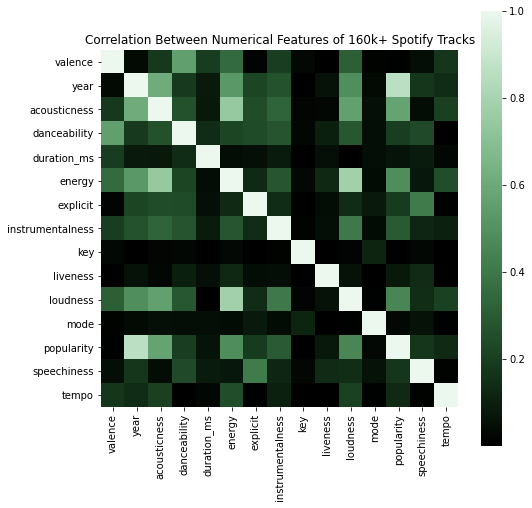

In [12]:
numeric_columns = spotify_data.columns[spotify_data.dtypes != 'object']

numeric_df = pd.DataFrame(data=spotify_data, columns=numeric_columns, index=spotify_data.index)
corr = np.abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation Between Numerical Features of 160k+ Spotify Tracks')
plt.show()

Let's actually visualize the count of songs released over years.

Text(0, 0.5, 'Number of Songs Released')

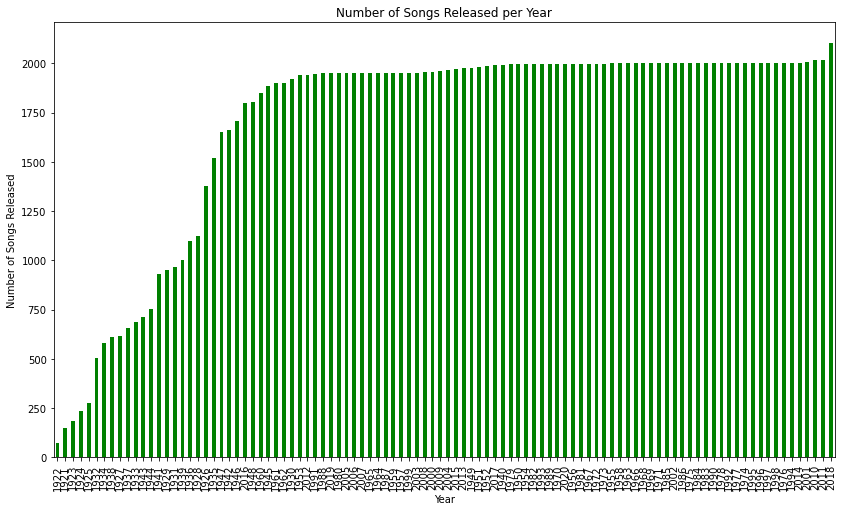

In [13]:
ax = spotify_data['year'].value_counts(ascending=True).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Songs Released per Year", color='green')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Songs Released")

To get an understanding of the trajectory of all the included features over the course of musical history (as included on Spotify, at least).

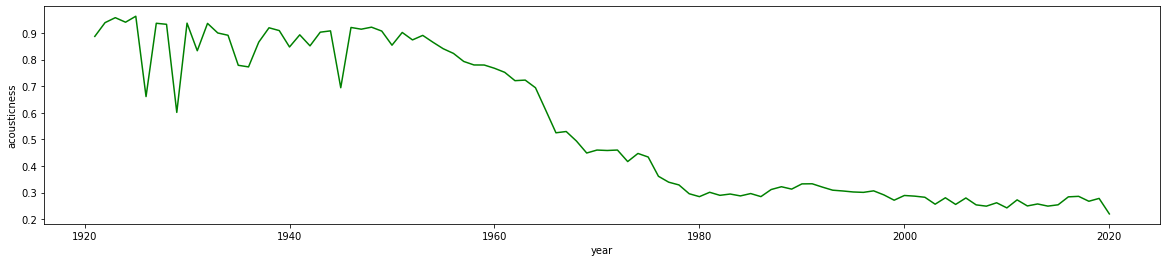

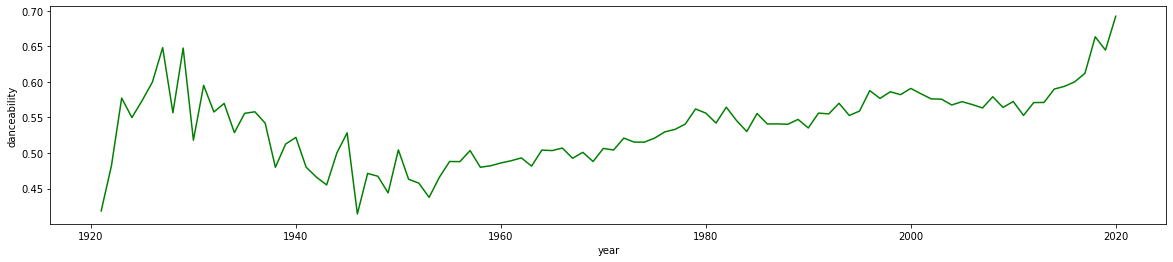

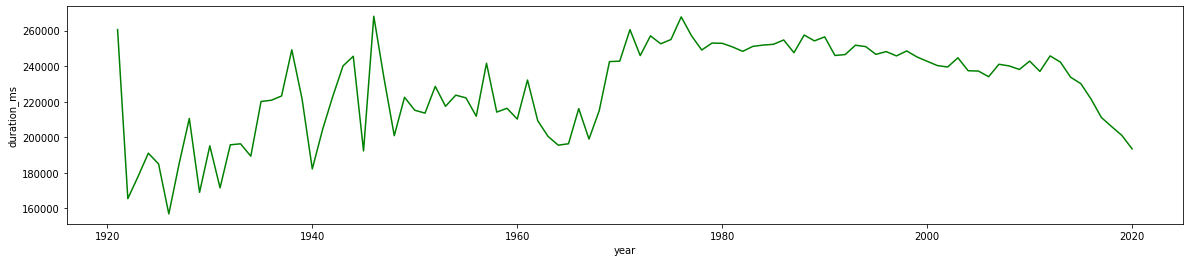

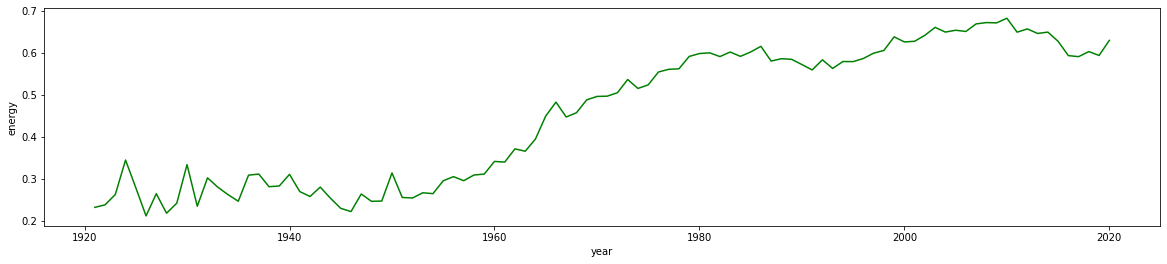

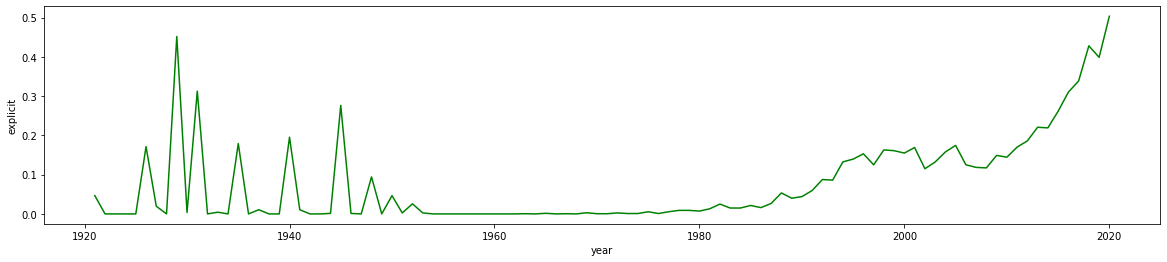

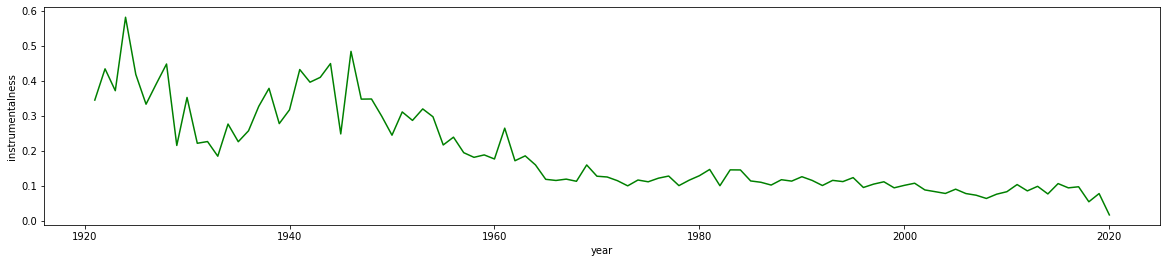

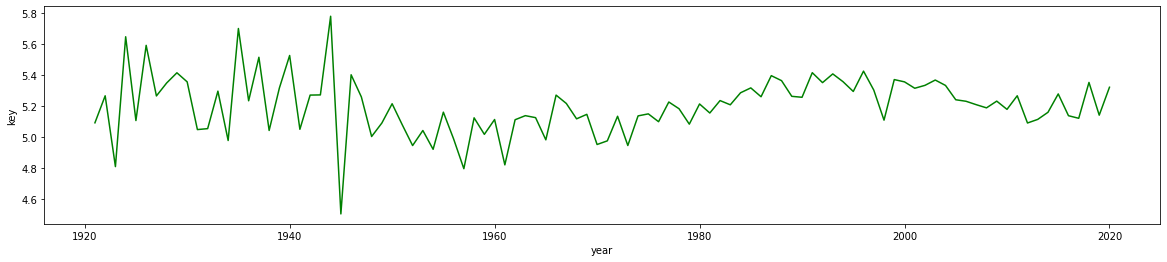

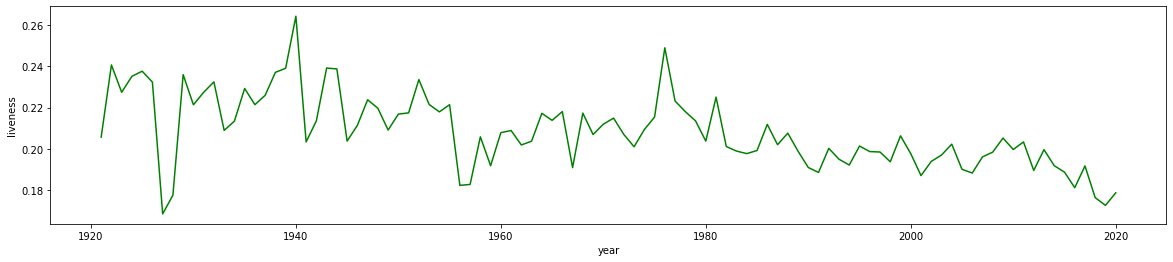

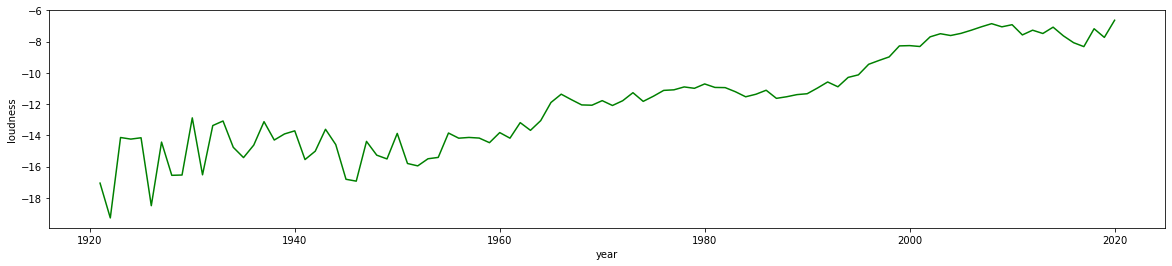

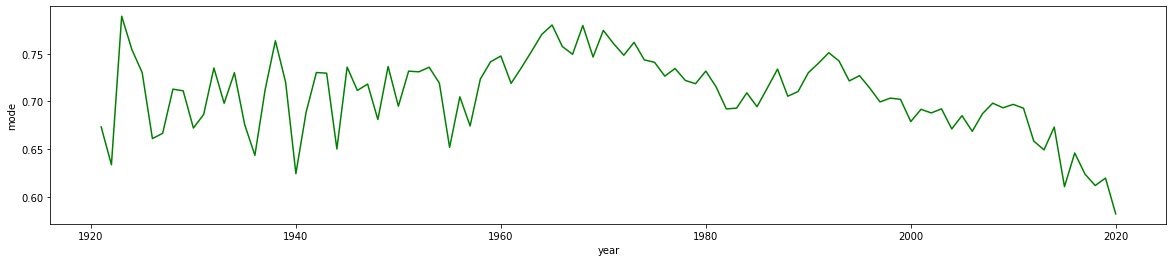

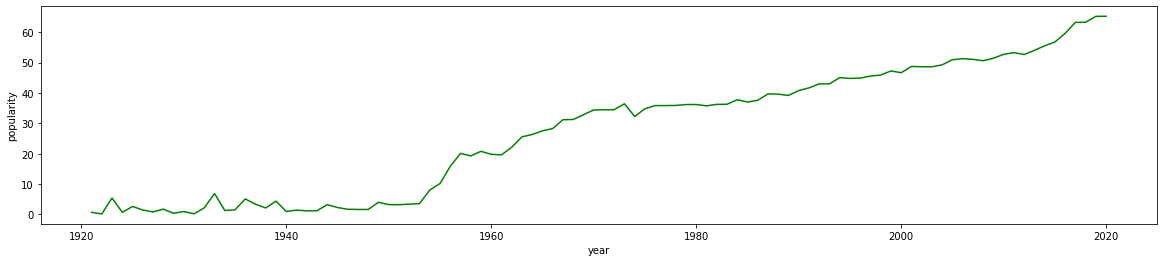

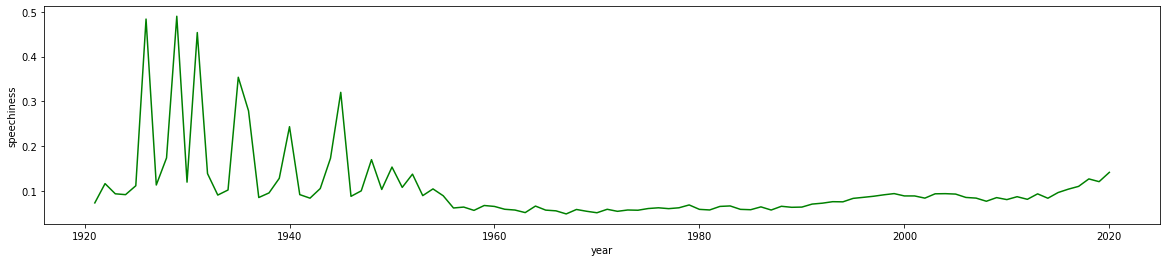

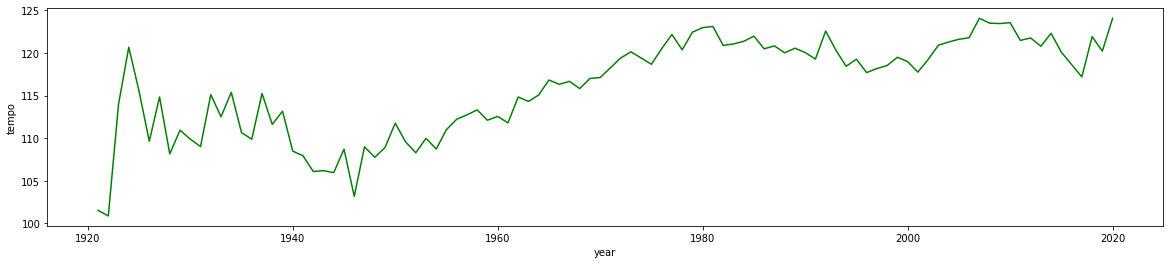

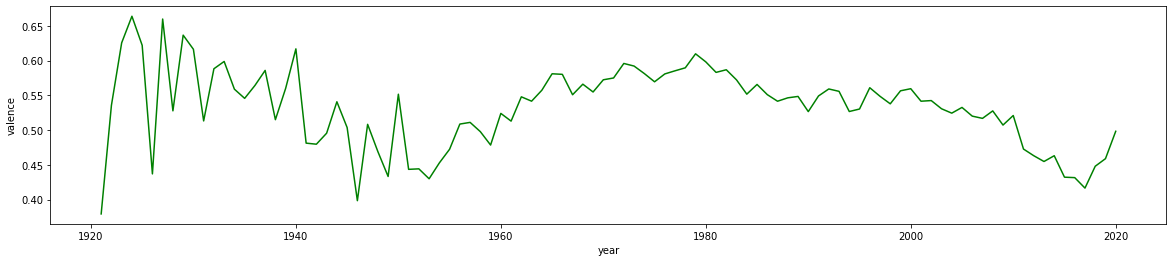

In [14]:
features = ['acousticness','danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'valence']
for feature in features:
    b = spotify_data.groupby('year')[feature].mean()
    a = b.index
    plt.figure(figsize=(20, 4))
    sns.lineplot(x=a, y=b, color = 'green')

And specifically, we were interested in seeing how each feature correlated with the year of release of Spotify tracks.

In [15]:
correlate_srs = np.abs(corr['year']).sort_values(ascending=False)
print('Features correlated with contribution to year of a track:')
for i, row in enumerate(correlate_srs):
    if 0 <= row < 1:
      print(f'{correlate_srs.index[i]:17} --> {row: .2f}')

Features correlated with contribution to year of a track:
popularity        -->  0.86
acousticness      -->  0.61
energy            -->  0.53
loudness          -->  0.49
instrumentalness  -->  0.27
explicit          -->  0.22
danceability      -->  0.19
speechiness       -->  0.17
tempo             -->  0.14
duration_ms       -->  0.08
liveness          -->  0.06
mode              -->  0.03
valence           -->  0.03
key               -->  0.01


Let's visualize the highest correlation, popularity!

In [16]:
%matplotlib inline
from pandas import Timestamp

In [17]:

from plotnine import *
import pydot
from plotnine import *
from tqdm import tqdm

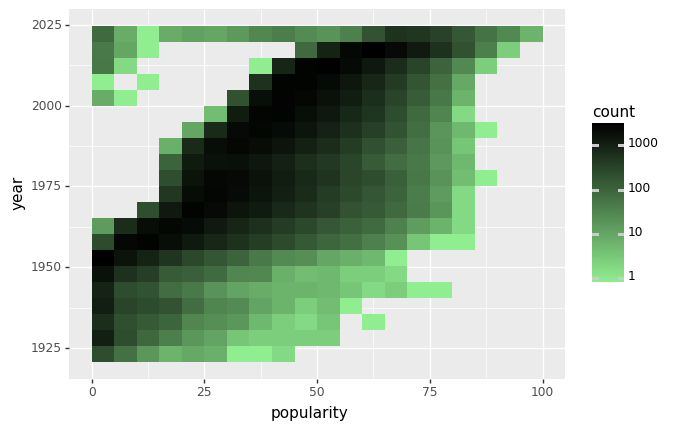

<ggplot: (8731807422079)>

In [18]:
df_test=spotify_data[['popularity','year']]
ggplot(df_test, aes(x='popularity', y='year')) + geom_bin2d(bins = 20) + scale_fill_gradient(low="lightgreen",high="black",trans="log10")

What about the feature with second highest correlation, acousticness?

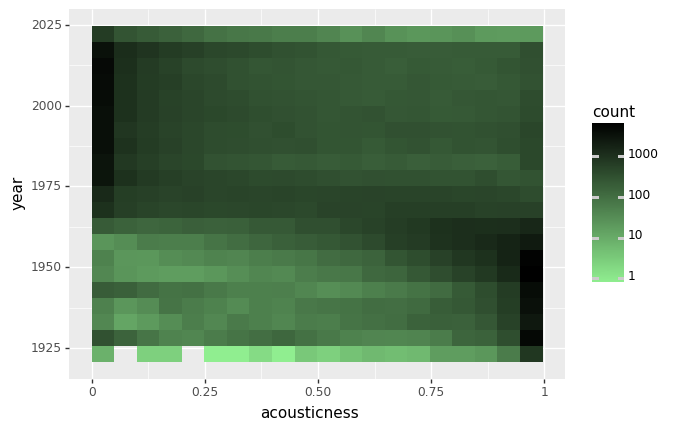

<ggplot: (8731807409114)>

In [19]:
df_test=spotify_data[['acousticness','year']]
ggplot(df_test, aes(x='acousticness', y='year')) + geom_bin2d(bins = 20) + scale_fill_gradient(low="lightgreen",high="black",trans="log10")

To take a closer look at songs' popularities, let's dig a bit into that first feature correlated with the year a track is released in.

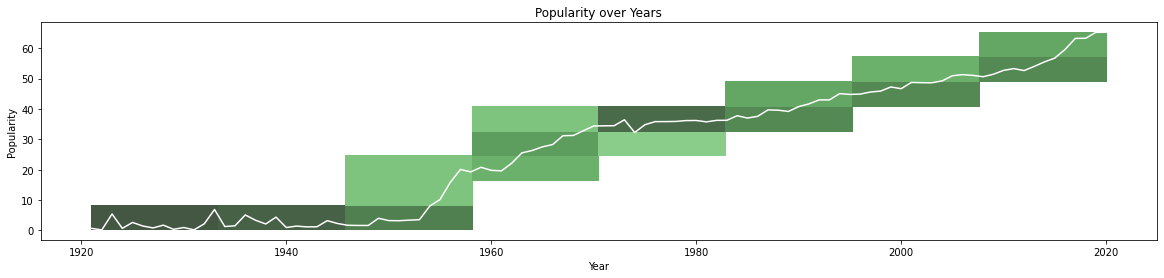

In [20]:
features = ['acousticness','danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'valence']

b = spotify_data.groupby('year')['popularity'].mean()
a = b.index
plt.figure(figsize=(20, 4))
plt.title('Popularity over Years')
plt.xlabel('Year')
plt.ylabel('Popularity')
sns.histplot(x=a, y=b, color = 'lightgreen')
sns.lineplot(x=a, y=b, color = 'white')
plt.show()

Interestingly enough, we see that there is an extremely high correlaton between popularity and year. This makes logical sense to us, as accessibility to music has seen only increases over time, which is paired with songs generally having higher popularity. This seemingly linear correlation also is expected to show a lull in the most recent years since some songs may not have songs that are ranked.

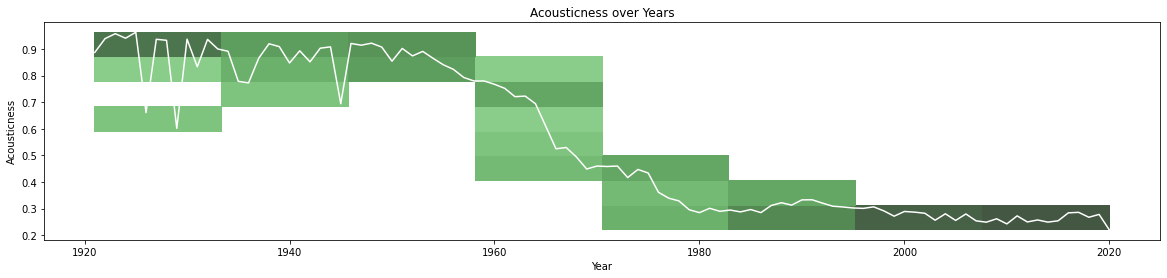

In [21]:
b = spotify_data.groupby('year')['acousticness'].mean()
a = b.index
plt.figure(figsize=(20, 4))
plt.title('Acousticness over Years')
plt.xlabel('Year')
plt.ylabel('Acousticness')
sns.histplot(x=a, y=b, color = 'lightgreen')
sns.lineplot(x=a, y=b, color = 'white')
plt.show()

#Pre-Processing

In [22]:
#imports needed
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [23]:
fixed_df = spotify_data

We want to drop features that do not have a clear correlation with year.

In [24]:
fixed_df = fixed_df.drop(['artists','name','release_date'],axis=1)

In [25]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170110 entries, 0 to 170652
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170110 non-null  float64
 1   year              170110 non-null  int64  
 2   acousticness      170110 non-null  float64
 3   danceability      170110 non-null  float64
 4   duration_ms       170110 non-null  int64  
 5   energy            170110 non-null  float64
 6   explicit          170110 non-null  int64  
 7   instrumentalness  170110 non-null  float64
 8   key               170110 non-null  int64  
 9   liveness          170110 non-null  float64
 10  loudness          170110 non-null  float64
 11  mode              170110 non-null  int64  
 12  popularity        170110 non-null  int64  
 13  speechiness       170110 non-null  float64
 14  tempo             170110 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 20.8 MB


In [26]:
fixed_df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170110.000000,170110.000000,170110.000000,170110.000000,1.701100e+05,170110.000000,170110.000000,170110.000000,170110.000000,170110.000000,170110.000000,170110.000000,170110.000000,170110.000000,170110.000000
mean,0.529246,1976.878990,0.500889,0.537838,2.309703e+05,0.483208,0.084839,0.165714,5.199612,0.205898,-11.444822,0.707001,31.526706,0.098516,116.895498
std,0.262955,25.876428,0.375731,0.176022,1.259665e+05,0.267378,0.278643,0.312317,3.514944,0.174869,5.677984,0.455139,21.791668,0.162946,30.697529
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.318000,1956.000000,0.101000,0.416000,1.699385e+05,0.256000,0.000000,0.000000,2.000000,0.098700,-14.581750,0.000000,12.000000,0.034900,93.478000
50%,0.540000,1978.000000,0.514000,0.548000,2.074930e+05,0.472000,0.000000,0.000210,5.000000,0.136000,-10.563000,1.000000,34.000000,0.045000,114.772500
75%,0.747000,1999.000000,0.891000,0.669000,2.623698e+05,0.704000,0.000000,0.097975,8.000000,0.261000,-7.177000,1.000000,48.000000,0.075700,135.566750
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


We realized that if both tempo and speechiness are equal to 0 in a row, it most likely is a track that wouldn't pertain to our modeling, since it has "no noise." To solve this, we applied a limit on both of the features.

In [27]:
fixed_df = fixed_df[(fixed_df.tempo > 0) & (fixed_df.speechiness > 0)]

#Modeling

## Random Forest Model

Creation of train and test sets.

In [28]:
forest_df = fixed_df

In [29]:
#display(forest_df.shape)

#split up into X and Y such that Y is the target
y = forest_df['year']
x = forest_df.drop(['year'], axis=1)

#split up into testing and training sets 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

Running the Random Forest Model.

In [33]:
from sklearn.ensemble import RandomForestRegressor
forestReg = RandomForestRegressor(max_depth= 20, n_estimators= 8, random_state=1)
forestReg.fit(x_train,y_train)
y_pred = forestReg.predict(x_test)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(forestReg.score(x_test, y_test))

0.8345303178696829


This score of 0.835 is promising! Let's visualize it.

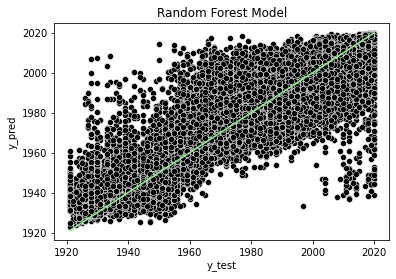

In [34]:
scatter = sns.scatterplot(x = y_test, y = y_pred, color = 'black')
sns.lineplot(x = y_test, y = y_test, color='lightgreen')
scatter.set_xlabel('y_test')
scatter.set_ylabel('y_pred')
scatter.set_title('Random Forest Model')
plt.show()

In [32]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

## Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Your code goes here

lin_reg = LinearRegression()
lin_reg_model = lin_reg.fit(x_train, y_train)

y_pred= lin_reg_model.predict(x_test)

mse_test = ((y_pred-y_test)**2).mean()

print(lin_reg.score(x_test, y_test))

0.7839910970624693


This score of 0.784 is promising! Let's visualize it.

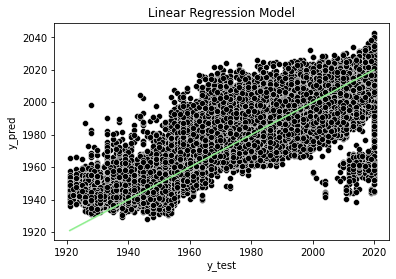

In [34]:
scatter = sns.scatterplot(x = y_test, y = y_pred, color = 'black')
sns.lineplot(x = y_test, y = y_test, color='lightgreen')
scatter.set_xlabel('y_test')
scatter.set_ylabel('y_pred')
scatter.set_title('Linear Regression Model')
plt.show()

## Decision Tree Model

In [39]:
from sklearn.tree import DecisionTreeRegressor  
  
tree =DecisionTreeRegressor(max_leaf_nodes=41, min_samples_split=2000)
  
tree.fit(x_train, y_train) 

y_pred= tree.predict(x_test)

print(tree.score(x_test, y_test))

0.7998346178366459


A score of 0.8 is promising! Let's visualize it.

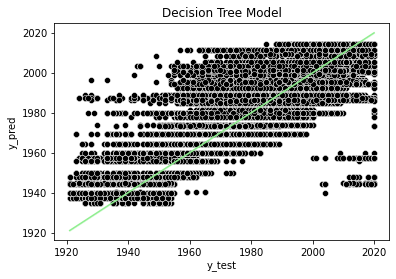

In [51]:
scatter = sns.scatterplot(x = y_test, y = y_pred, color = 'black')
sns.lineplot(x = y_test, y = y_test, color='lightgreen')
scatter.set_xlabel('y_test')
scatter.set_ylabel('y_pred')
scatter.set_title('Decision Tree Model')
plt.show()

We thought it would be interesting to see how each feature plays into the decision tree predictive model and so printed out the feature importances below.

In [52]:
print('Importance each Feature Plays in the Decisions:')
for i, col in enumerate(x_train.columns):
  print(f'{col:12}: {tree.feature_importances_[i]:.3f}')

Importance each Feature Plays in the Decisions:
valence     : 0.006
acousticness: 0.022
danceability: 0.002
duration_ms : 0.001
energy      : 0.003
explicit    : 0.009
instrumentalness: 0.000
key         : 0.000
liveness    : 0.000
loudness    : 0.030
mode        : 0.000
popularity  : 0.925
speechiness : 0.001
tempo       : 0.000


We also visualized our decision tree the image is of bad quality as we screenshotted but the file is created in the notebook files and can be visualised on http://www.webgraphviz.com/

In [53]:
from sklearn.tree import export_graphviz  

export_graphviz(tree, out_file ='tree.dot', feature_names = x_train.columns) 

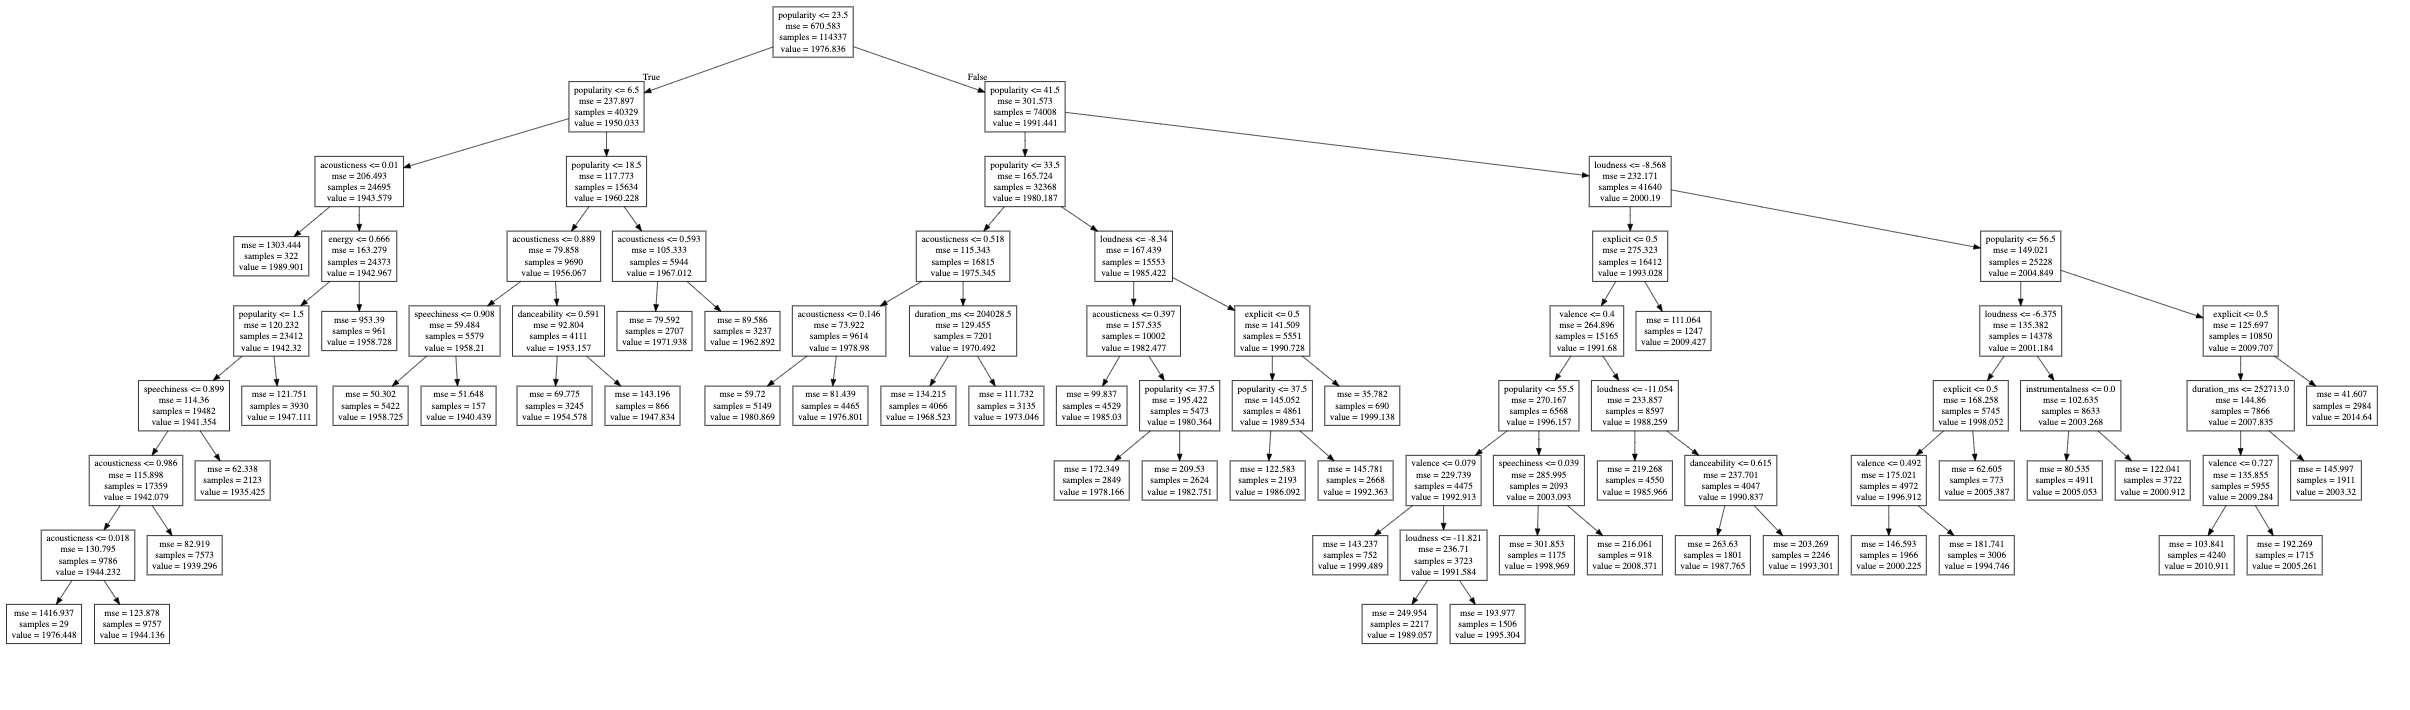

## Logistic Regression

In [54]:
#training the logistic regression model 
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

logmodel = LogisticRegression(max_iter=500,random_state=42)
logmodel = logmodel.fit(x_train_scaled,y_train)
print(logmodel)
predictions = logmodel.predict(x_test_scaled)

logmodel.score(x_test_scaled, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


0.07701907648422178

Ouch! This score isn't very good...

Knowing that Logistic Regression may prefer 0s and 1s in the sets, let's do some one-hot-encoding!

In [32]:
#ONE HOT ENCODING
one_hot_encoder = fixed_df
one_hot_encoder = one_hot_encoder.drop(['valence', 'key', 'liveness', 'speechiness', 'tempo', 'mode'],axis=1)
#Split the data to train and test
x_train, x_test, y_train, y_test = split(one_hot_encoder.drop('year', axis=1), one_hot_encoder['year'], test_size = 0.2, random_state = 42)

Created functions to transform several of the features to the one-hot-encoder to be used in a Logistic Regression Model. 

In [33]:
#transform some of the features into groups, we have decided to make 4 groups depending on range of the feature

def popularity_transform(df):
    df['popularity'] = list(map((lambda x: 1 if x < 25 else (2 if x < 50 else (3 if x < 75 else 4))), df.popularity))

pop_tranformer = FunctionTransformer(popularity_transform)
pop_tranformer.transform(x_train)
pop_tranformer.transform(x_test)

def acousticness_transform(df):
   df['acousticness'] = list(map((lambda x: 1 if x < 0.25 else (2 if x < 0.50 else (3 if x < 0.75 else 4))), df.acousticness))

acc_tranformer = FunctionTransformer(acousticness_transform)
acc_tranformer.transform(x_train)
acc_tranformer.transform(x_test)

def energy_transform(df):
    df['energy'] = list(map((lambda x: 1 if x < 0.25 else (2 if x < 0.50 else (3 if x < 0.75 else 4))), df.energy))

ener_tranformer = FunctionTransformer(energy_transform)
ener_tranformer.transform(x_train)
ener_tranformer.transform(x_test)

def loudness_transform(df):
    max_loudness = max(df.loudness)
    min_loudness = min(df.loudness)
    range = max_loudness - min_loudness
    increment = range/4
    df['loudness'] = list(map((lambda x: 1 if x < min_loudness+increment else (2 if x < min_loudness+(increment*2)
                                                                     else (3 if x <  min_loudness+(increment*3) else 4))), df.loudness))

loud_tranformer = FunctionTransformer(loudness_transform)
loud_tranformer.transform(x_train)
loud_tranformer.transform(x_test)

def duration_transform(df):
    max_duration = max(df.duration_ms)
    min_duration = min(df.duration_ms)
    range = max_duration - min_duration
    increment = range/5
    df['duration_ms'] = list(map((lambda x: 1 if x < min_duration+increment else (2 if x < min_duration+(increment*2)
                                                                     else (3 if x <  min_duration+(increment*3) else 4))), df.duration_ms))

dur_tranformer = FunctionTransformer(duration_transform)
dur_tranformer.transform(x_train)
dur_tranformer.transform(x_test)

def instrumentalness_transform(df):

    df['instrumentalness'] = list(map((lambda x: 1 if x < 0.25 else (2 if x < 0.50 else (3 if x < 0.75 else 4))), df.instrumentalness))

instr_tranformer = FunctionTransformer(instrumentalness_transform)
instr_tranformer.transform(x_train)
instr_tranformer.transform(x_test)

def danceability_transform(df):

    df['danceability'] = list(map((lambda x: 1 if x < 0.25 else (2 if x < 0.50 else (3 if x < 0.75 else 4))), df.danceability))

dance_tranformer = FunctionTransformer(danceability_transform)
dance_tranformer.transform(x_train)
dance_tranformer.transform(x_test)

In [34]:
acoustTrain = pd.get_dummies(x_train['acousticness'], prefix='acousticness')
danceTrain = pd.get_dummies(x_train['danceability'], prefix='danceability')
durTrain = pd.get_dummies(x_train['duration_ms'], prefix='duration_ms')
energyTrain = pd.get_dummies(x_train['energy'], prefix='energy')
explicitTrain = pd.get_dummies(x_train['explicit'], prefix='explicit')
instrTrain = pd.get_dummies(x_train['instrumentalness'], prefix='instrumentalness')
loudTrain = pd.get_dummies(x_train['loudness'], prefix='loudness')
popTrain = pd.get_dummies(x_train['popularity'], prefix='popularity')

acoustTest = pd.get_dummies(x_test['acousticness'], prefix='acousticness')
danceTest = pd.get_dummies(x_test['danceability'], prefix='danceability')
durTest = pd.get_dummies(x_test['duration_ms'], prefix='duration_ms')
energyTest = pd.get_dummies(x_test['energy'], prefix='energy')
explicitTest = pd.get_dummies(x_test['explicit'], prefix='explicit')
instrTest = pd.get_dummies(x_test['instrumentalness'], prefix='instrumentalness')
loudTest = pd.get_dummies(x_test['loudness'], prefix='loudness')
popTest = pd.get_dummies(x_test['popularity'], prefix='popularity')

x_train = x_train.drop(['popularity', 'acousticness', 'danceability','duration_ms','energy', 'explicit','instrumentalness','loudness'], axis=1)
x_train = pd.concat([x_train, acoustTrain, danceTrain, durTrain, energyTrain, explicitTrain, instrTrain, loudTrain, popTrain],axis=1)

x_test = x_test.drop(['popularity', 'acousticness','danceability','duration_ms','energy', 'explicit','instrumentalness','loudness'], axis=1)
x_test = pd.concat([x_test, acoustTest, danceTest, durTest, energyTest, explicitTest, instrTest, loudTest, popTest],axis=1)

## Logistic Regression (2.0)



In [58]:
#training the logistic regression model 
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

logmodel = LogisticRegression(max_iter=500,random_state=42)
logmodel=logmodel.fit(x_train_scaled,y_train)
print(logmodel)
predictions = logmodel.predict(x_test_scaled)

logmodel.score(x_test_scaled, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


0.059334000117667825

In [59]:
logmodel.score(x_test_scaled, y_test)

0.059334000117667825

That didn't exactly help... The one-hot-encoding may not be suited as a good way to represent this data. Let's still try it on one of our other models, Linearr Regression to see if we get any promising results. 

## Linear Regression (2.0)

What if we do a Linear Regression again, but this time on the one-hot-encoded data?

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Your code goes here

lin_reg = LinearRegression()
lin_reg_model = lin_reg.fit(x_train, y_train)

y_pred= lin_reg_model.predict(x_test)

mse_test = ((y_pred-y_test)**2).mean()

print(lin_reg.score(x_test, y_test))


0.7062024111239662


Compared to our Linear Regression score of 0.784 from the non-one-hot-encoded sets, this is lower, which means the categorization of the values takes away from the specificity of our result. 

# Making Predictions

First, let's remind ourselves of our original dataset from the Spotify API.

In [61]:
spotify_data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


## "Spotify Wrapped":
Here are some of our favorite songs. We wanted to test our most effective model to see if it could guess what year they were released in based on their features!

* Not Afraid - Eminem
* Dynamite - Taio Cruz
* Licence to Kill - Gladys Knight
* Liability - Lorde
* Light of the Seven - Ramin Djawadi

In [66]:
# valence	year	acousticness	danceability	duration_ms	energy	explicit	instrumentalness	key	liveness	loudness	mode	popularity	speechiness	tempo

not_afraid = spotify_data[spotify_data['name'] == "Not Afraid"]
# 2010
not_afraid = [0.650, 0.537000, 0.852, 248133, 0.955, 0, 0.000000, 0, 0.3560, -1.206, 0, 41, 0.2750, 114.640]
not_afraid = np.asarray(not_afraid)
not_afraid = not_afraid.reshape(1, -1)
eminem_not_afraid = forestReg.predict(not_afraid)
eminem_not_afraid = eminem_not_afraid.tolist()
eminem_not_afraid = eminem_not_afraid[0]
eminem_not_afraid = str(eminem_not_afraid)
print("Our prediction indicates that Not Afraid by Eminem was released in " + eminem_not_afraid)
print("In reality, it was released in 2010")

dynamite = spotify_data[spotify_data['name'] == "Dynamite"]
# 2011
dynamite = [0.818, 0.003320, 0.754, 203867, 0.804, 0, 0.000000, 4, 0.0329, -3.177, 1, 72, 0.0853, 119.968]
dynamite = np.asarray(dynamite)
dynamite = dynamite.reshape(1, -1)
taio_cruz_dynamite = forestReg.predict(dynamite)
taio_cruz_dynamite = taio_cruz_dynamite.tolist()
taio_cruz_dynamite = taio_cruz_dynamite[0]
taio_cruz_dynamite = str(taio_cruz_dynamite)
print("Our prediction indicates that Dynamite by Taio Cruz was released in " + taio_cruz_dynamite)
print("In reality, it was released in 2011")

licence_to_kill = spotify_data[spotify_data['name'] == "Licence To Kill"]
# 1989
licence_to_kill = [0.38, 0.128, 0.574, 314467, 0.656, 0, 0.0, 2, 0.18, -7.834, 1, 50, 0.0316, 77.976]
licence_to_kill = np.asarray(licence_to_kill)
licence_to_kill = licence_to_kill.reshape(1, -1)
gladys_knight_licence_to_kill = forestReg.predict(licence_to_kill)
gladys_knight_licence_to_kill = gladys_knight_licence_to_kill.tolist()
gladys_knight_licence_to_kill = gladys_knight_licence_to_kill[0]
gladys_knight_licence_to_kill = str(gladys_knight_licence_to_kill)
print("Our prediction indicates that Licence to Kill by Gladys Knight was released in " + gladys_knight_licence_to_kill)
print("In reality, it was released in 1989")

liability = spotify_data[spotify_data['name'] == "Liability"]
# 2017
liability = [0.379, 0.92, 0.587, 171728, 0.229, 0, 0.0, 10, 0.1, -11.254, 0, 73, 0.128, 75.67]
liability = np.asarray(liability)
liability = liability.reshape(1, -1)
lorde_liability = forestReg.predict(liability)
lorde_liability = lorde_liability.tolist()
lorde_liability = lorde_liability[0]
lorde_liability = str(lorde_liability)
print("Our prediction indicates that Liability by Lorde was released in " + lorde_liability)
print("In reality, it was released in 2017")

light_of_the_seven = spotify_data[spotify_data['name'] == "Light of the Seven"]
# 2016
light_of_the_seven = [0.0583, 0.903, 0.273, 589095, 0.102, 0, 0.721, 0, 0.268, -16.843, 0, 54, 0.0494, 120.378]
light_of_the_seven = np.asarray(light_of_the_seven)
light_of_the_seven = light_of_the_seven.reshape(1, -1)
ramin_djawadi_light_of_the_seven = forestReg.predict(light_of_the_seven)
ramin_djawadi_light_of_the_seven = ramin_djawadi_light_of_the_seven.tolist()
ramin_djawadi_light_of_the_seven = ramin_djawadi_light_of_the_seven[0]
ramin_djawadi_light_of_the_seven = str(ramin_djawadi_light_of_the_seven)
print("Our Prediction Indicates that Light of the Seven by Ramin Djawadi was Released in: " + ramin_djawadi_light_of_the_seven)
print("In reality, it was released in 2016")

Our prediction indicates that Not Afraid by Eminem was released in 2000.625
In reality, it was released in 2010
Our prediction indicates that Dynamite by Taio Cruz was released in 2010.8750262605042
In reality, it was released in 2011
Our prediction indicates that Licence to Kill by Gladys Knight was released in 1995.794781063531
In reality, it was released in 1989
Our prediction indicates that Liability by Lorde was released in 2017.4583333333333
In reality, it was released in 2017
Our Prediction Indicates that Light of the Seven by Ramin Djawadi was Released in: 2008.2430555555557
In reality, it was released in 2016


While some of our predictions were a bit off, we do see that for the majority, they fall in the correct ballpark. Yay! We know we have awesome tastes in music, follow us by scanning our Spotify account codes :)
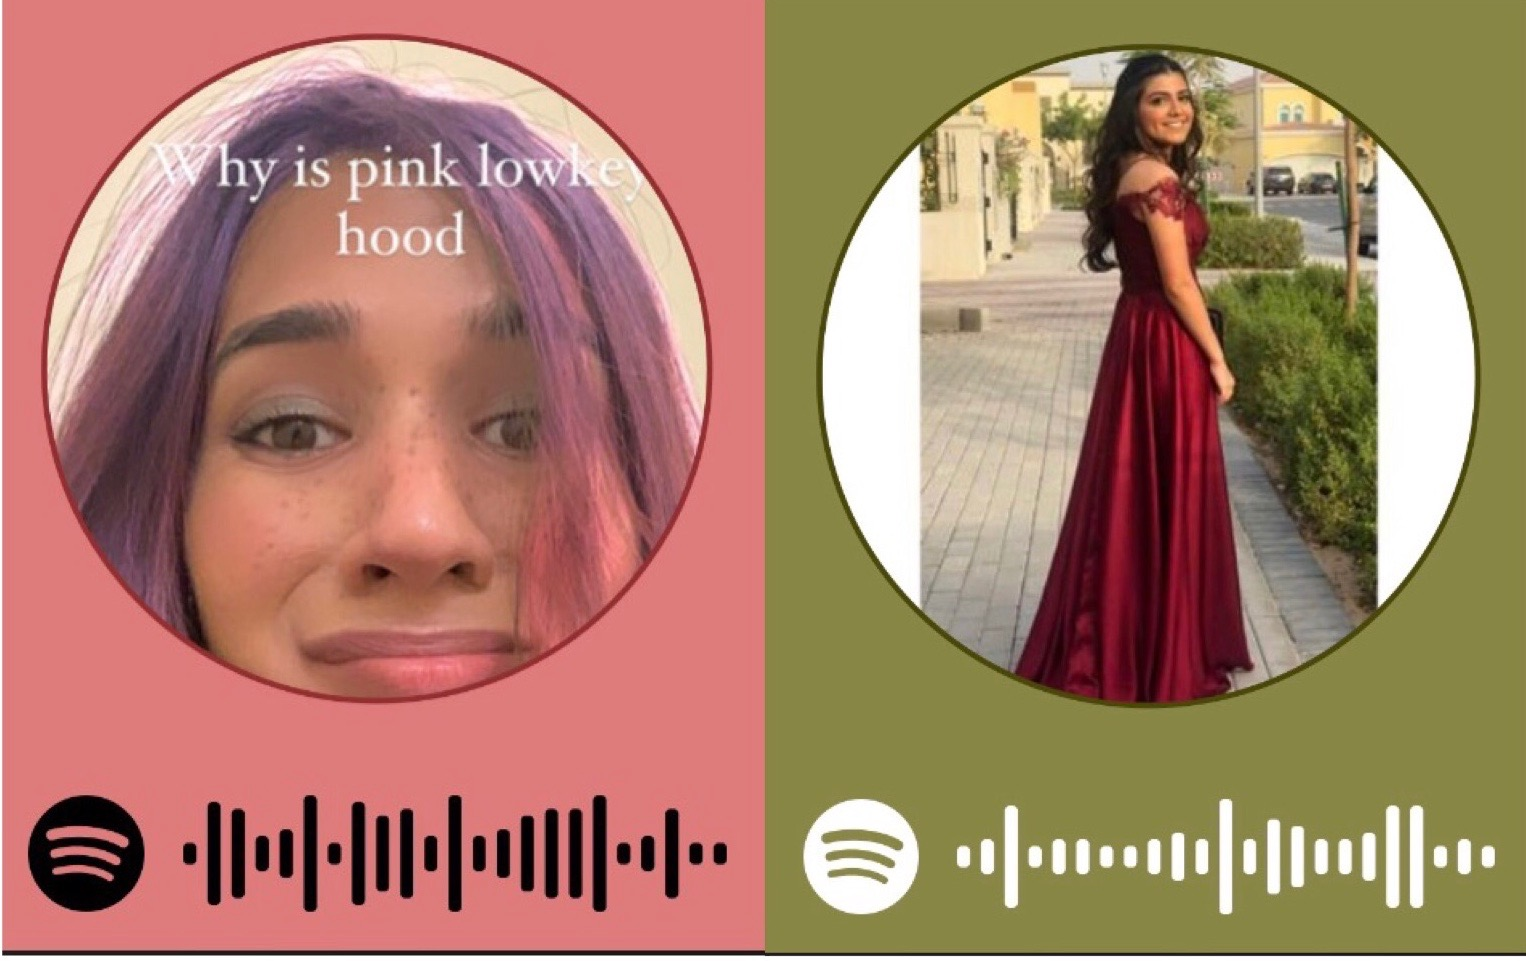

# Some More Interesting Stuff!

As members of a performing arts group that fuses traditional songs with modern tunes, we are interested in understanding the role that history has played in the development of music and songs’ key features. But as avid music-listeners, we are also curious about the trends our music tastes have taken on!


We are curious about how explicitness of a song can be correlated to popularity. 

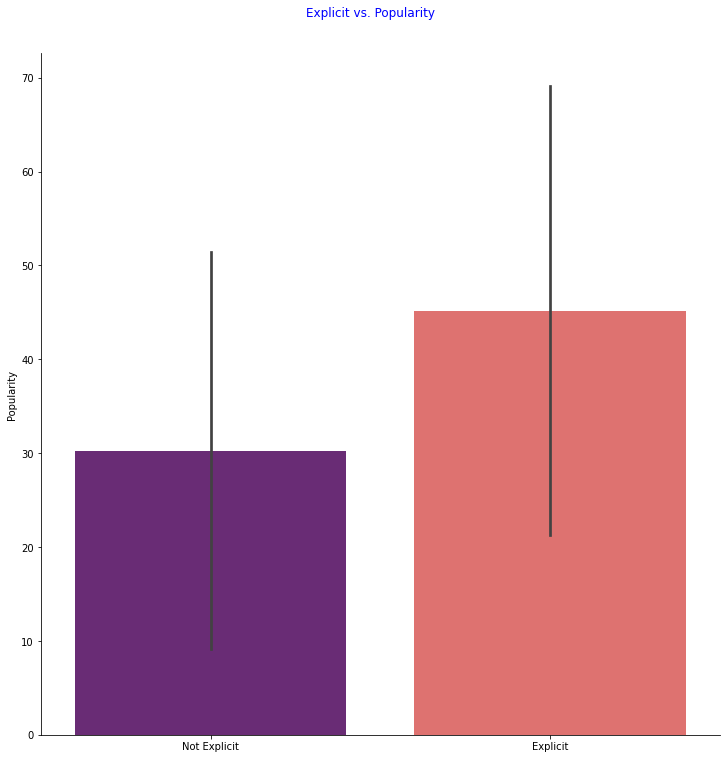

In [36]:
explicit_data = sns.catplot(data=spotify_data, kind="bar", x="explicit", y="popularity", ci="sd", palette='magma', height=10)
explicit_data.fig.suptitle('Explicit vs. Popularity', y=1.05, c='b')
explicit_data.set_axis_labels("", "Popularity")
explicit_data.set_xticklabels(['Not Explicit', 'Explicit'])
plt.show()

What about danceability?

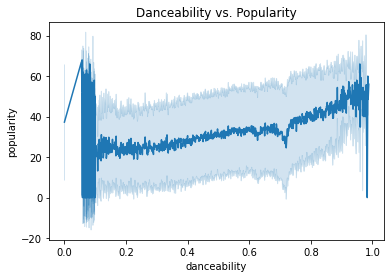

In [37]:
dance_data = sns.lineplot(data=spotify_data, x="danceability", y="popularity", ci="sd", palette="magma")
dance_data.set_title('Danceability vs. Popularity')
plt.show()

What about key?

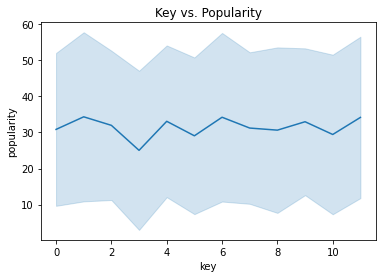

In [38]:
dance_data = sns.lineplot(data=spotify_data, x="key", y="popularity", ci="sd", palette="flare")
dance_data.set_title('Key vs. Popularity')
plt.show()

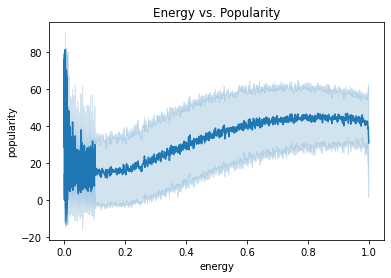

In [39]:
dance_data = sns.lineplot(data=spotify_data, x="energy", y="popularity", ci="sd", palette="flare")
dance_data.set_title('Energy vs. Popularity')
plt.show()

# Conclusion

Our investigation used Random Forest, Linear Regression, Decision Tree, and Logistic Regression models. Our of these, we found Random Forest to be the most accurate. We then used it to test out some of our favorite songs. 

To improve this further, we would look for more ways to normalize our data, remove any more outliers, and possibly combine datasets to increase the number of attributes a track may have. 

And that's a (Spotify) WRAP(ped)!